In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['ggplot'])

Create Data

Generate some data with:

$\theta_0= 4$

$\theta_1= 3$

$y = \theta_0 + \theta_1  x$

Add some Gaussian noise to the data.

In [ ]:
theta_0 = 4
theta_1 = 3

n_samples = 1000

np.random.seed(10)
X = 2 * np.random.rand(n_samples,1)
y = theta_0 + theta_1 * X+np.random.randn(n_samples,1)*2

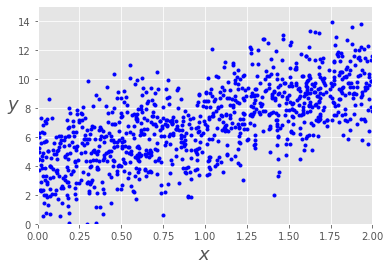

In [ ]:
"""
Let's plot our data to check the relation between X and Y
"""
plt.figure(1)
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

Analytical way of Linear Regression

In matrix form:
    A = [1 , X]
    theta = [$\theta_0, \theta_1]^t$

with 1 column of 1's and X a column vector containing the sample X's

So $y = A \theta$

Use the pseudo inverse:
    $\theta = [ (A^t A)^{(-1)} A^t ] y$


In [ ]:
A = np.c_[np.ones((X.size,1)),X]
theta = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
print('Theta (analytical): [ {:0.3f} , {:0.3f} ]^t'.format(theta[0][0],theta[1][0]))

Theta (analytical): [ 3.932 , 3.030 ]^t


(0.0, 2.0, 0.0, 15.0)

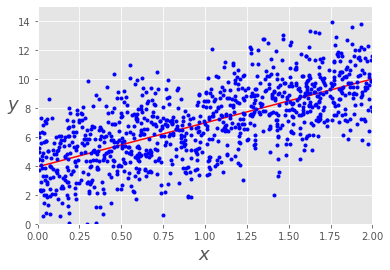

In [ ]:
""" Let's plot the prediction line with the calculated theta"""

X_ln = np.array([min(X),max(X)]) #Plot a line between min x and max x
A_ln = np.c_[np.ones((2,1)),X_ln]
y_ln = A_ln.dot(theta)

plt.figure(1)
plt.plot(X_ln,y_ln,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


Compute the residual error, as given by the cost function $J(\theta)$

$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h(\theta^{(i)}) - y^{(i)})^2 $

where $y^{(i)} =   h^{(i)}\theta =   [1 , X] \theta =   A^{(i)} \theta$


In [ ]:
def cal_cost(theta,X,y):
    '''
    theta = [theta_0 theta_1]^t
    A = [1 , X]
    y = A theta
    '''
    A = np.c_[np.ones((X.size,1)),X]

    m = len(y)
    y_pred = A.dot(theta)
    J = (0.5/m) * np.sum(np.square(y_pred-y))

    return J


J = cal_cost(theta,X,y)
print('Cost / MSE (analytical):   {:0.3f}'.format(J))

Cost / MSE (analytical):   1.925


In [ ]:
def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    '''
    A = [1 , X]
    y = A theta
    theta = [theta_0 theta_1]^t
    alpha = learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''
    A = np.c_[np.ones((X.size,1)),X]

    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        #TODO

    return theta, cost_history, theta_history

In [ ]:
"""
Let's start with 500 iterations and a learning rate of 0.01
Start with a random theta (extracted from a Gaussian distribution mean 0 std 1)
"""

alpha =0.01
n_iter = 500

np.random.seed(20)
theta_start = np.random.randn(2,1)+np.array([[-2],[4]])

theta,cost_history,theta_history = gradient_descent(X,y,theta_start,alpha,n_iter)

print('Theta (GD): [ {:0.3f} , {:0.3f} ]^t'.format(theta[0][0],theta[1][0]))
print('Cost / MSE (GD):   {:0.3f}'.format(cost_history[-1]))

Theta (GD): [ 1.615 , 5.133 ]^t
Cost / MSE (GD):   2.709


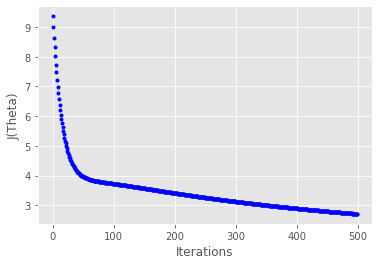

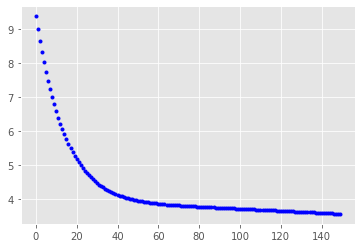

In [ ]:

""" Let's plot the cost history over iterations"""

fig,ax = plt.subplots(num=2)

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

""" Let us zoom in till iteration 150 """

fig,ax = plt.subplots(num=3)
_=ax.plot(range(150),cost_history[:150],'b.')